![BAIME banner](https://user-images.githubusercontent.com/47600826/89530907-9b3f6480-d7ef-11ea-9849-27617f6025cf.png)

# Prediction Credit Risk

![credit risk score](https://lh3.googleusercontent.com/proxy/FFZaDEN6DnV9eU-r0dP0qyry5CCS6nqZptUAPuQr3zmG0roO3AYC9sNekOhD9qOhGCUuqjYmLe49yhYCz96gEx5uK0qS3_ro2J74el4rMLIyi5j7Z0wE90WoMV_buPh9C2j8FD2zUXNPOdTdUuCX5j4P8CITX7UU6sNw9gJTJTgnCCQ6AZxT3Tie0TsGFhtQId_LxDk)

## The problem
In this notebook we look at the data we got via this [Kaggle competition](https://www.kaggle.com/uciml/german-credit). 

We will see if we can predict whether or not the credit score is good. 

We will explore the dataset given, check the various features we have and we will make an algorithm that can predict the credit risk.

# Import the important libraries / packages
These packages are needed to load and use the dataset

In [35]:
#Load the packages
import pandas as pd #we use this to load, read and transform the dataset
import numpy as np #we use this for statistical analysis
import matplotlib.pyplot as plt #we use this to visualize the dataset
import seaborn as sns #we use this to make countplots
import sklearn.metrics as sklm #This is to test the models



# Load and explore the dataset
We've gotten a dataset. In this next step I will first load the data set to see how this looks like

In [36]:
#here we load the data
data = pd.read_csv(r'C:\Users\Renate\Documents\GitHub\Data-Projects\Kaggle\Kaggle - Credit risk German data\german_credit_data_withlabel.csv', index_col = 0)

#and immediately I would like to see how this dataset looks like
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [37]:
#now let's look closer at the dataset we got
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


It seems that we have a lot of text / category information (these are of the Dtype 'object') and a few numerical columns (Dtypes 'int64').

The following columns have missing data: 
- Saving accounts
- Checking account

The last column 'Risk' is the column we would like to predict. 

In [38]:
data.shape

(1000, 10)

The dataset consists of 1.000 rows and 10 columns. 

In [39]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


It seems that we have some outliers for the credit amount and duration. We will look and handle these later on. 

In [40]:
data.describe(include='O')

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
count,1000,1000,817,606,1000,1000
unique,2,3,4,3,8,2
top,male,own,little,little,car,good
freq,690,713,603,274,337,700


In [41]:
#Let's see what the options are in the text columns (the objects)
print(data.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


Seems there are more categorical columns, let's look closer at the different columns

# Credit risk in the dataset
As this is the column we would like to predict, let's look closer to this column. 


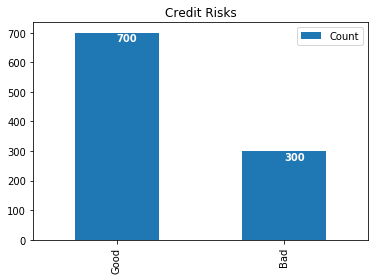

In [42]:
#first let's count the good and bad risks
Good = data[data['Risk'] == 'good']['Risk'].count()
Bad = data[data['Risk'] == 'bad']['Risk'].count()

#now let's put these results in a dataframe to visualize them
df = {"Count" : [Good, Bad]} #this is for the legend to be clear that it is counts
Status = pd.DataFrame(df, index=["Good", "Bad"])

#let's visualize the bar plot
ax = Status.plot(kind = 'bar', title = 'Credit Risks')

#here I want to add the labels to the bars and to make this more clear I've made them white of color
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() - 30), color = 'white', fontweight = 'bold')

In [43]:
#let's see the percentages of the risks:
print('The percentage of good risks : %.2f' % (data['Risk'].value_counts()[0] / len(data)))
print('The percentage of bad risks : %.2f' % (data['Risk'].value_counts()[1] / len(data)))

The percentage of good risks : 0.70
The percentage of bad risks : 0.30


In [44]:
#What if we transform yes or no to a random percentage below 50 if no and above 50 if yes? 

#First make the target column (Loan_Status) numerical
#data['Risk'] = np.where((data['Risk'] == 'good'), 1, 0)

    
data['percentage'] = data['Risk'].apply(lambda x: np.random.randint(50,100) if x == 'good' else np.random.randint(0,49))
data.head(25)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,percentage
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,76
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,30
2,49,male,1,own,little,NaN,2096,12,education,good,63
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,76
4,53,male,2,free,little,little,4870,24,car,bad,40
5,35,male,1,free,NaN,NaN,9055,36,education,good,67
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,70
7,35,male,3,rent,little,moderate,6948,36,car,good,86
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good,57
9,28,male,3,own,little,moderate,5234,30,car,bad,37


In [45]:
data['percentage'].nunique()

99

It looks like this is not well balanced in this set.
But as this is the only data we have, I will leave this as is for now. 

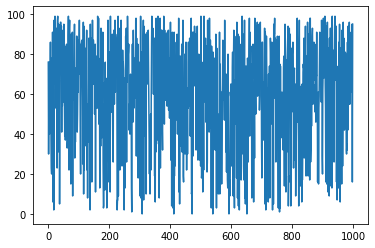

In [46]:
data['percentage'].plot()

# Handling missing values
Let's continue with handling the missing values in this dataset. 

In [47]:
#let's look in what columns there are missing values 
data.isnull().sum().sort_values(ascending = False)

Checking account    394
Saving accounts     183
percentage            0
Risk                  0
Purpose               0
Duration              0
Credit amount         0
Housing               0
Job                   0
Sex                   0
Age                   0
dtype: int64

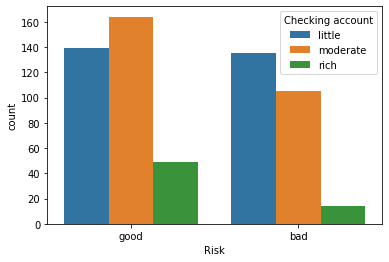

In [48]:
#Let's look at the Checking account in more detail to see what the best way is to handle these missing values
#I will use seaborn for the visualization
sns.countplot(data['Risk'],hue=data['Checking account'])

In [49]:
print(pd.crosstab(data['Checking account'],data['Risk']))

Risk              bad  good
Checking account           
little            135   139
moderate          105   164
rich               14    49


It seems that it might have no influence to whether or not a risk is good or bad, as for little the counts are the same and for moderate the counts are in favor of bad risk and for rich this lies 22% - 78% balance. 

Options in handling these missing values:
- Drop all the rows with missing values
- Handle the missing values with no_inf (so no checking account) as there is nothing clear. 
- We assign the missing values to its nearest neighbors
- Or we ignore this as a good feature and drop this column

In this case I would tend to fill the missing values with 0, as this column is not the best feature

In [50]:
data['Checking account'] = data['Checking account'].fillna('no_inf')
data.isnull().sum().sort_values(ascending = False)

Saving accounts     183
percentage            0
Risk                  0
Purpose               0
Duration              0
Credit amount         0
Checking account      0
Housing               0
Job                   0
Sex                   0
Age                   0
dtype: int64

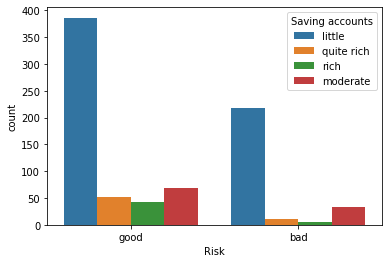

In [51]:
#continue with Saving accounts
sns.countplot(data['Risk'],hue=data['Saving accounts'])

Also here we see no real correlation to the risk. Let's handle them as we did the Checking account

In [52]:
data['Saving accounts'] = data['Saving accounts'].fillna('no_inf')
data.isnull().sum().sort_values(ascending = False)

percentage          0
Risk                0
Purpose             0
Duration            0
Credit amount       0
Checking account    0
Saving accounts     0
Housing             0
Job                 0
Sex                 0
Age                 0
dtype: int64

# Take a closer look at some of the features
let's look at the outliers!

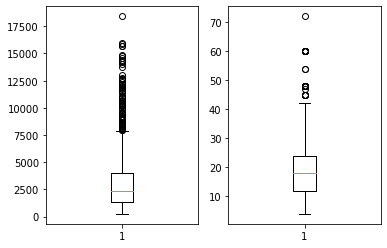

In [53]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.boxplot(data['Credit amount'])
ax2.boxplot(data['Duration'])
ax.set_ylabel('Counts')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x23a7c5be5f8>,
 'caps': [<matplotlib.lines.Line2D at 0x23a7c5bec88>,
 'boxes': [<matplotlib.lines.Line2D at 0x23a7c5be208>],
 'medians': [<matplotlib.lines.Line2D at 0x23a7c5bef60>],
 'fliers': [<matplotlib.lines.Line2D at 0x23a7c5c96a0>],
 'means': []}

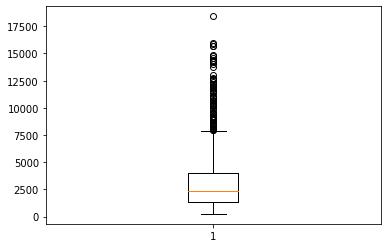

In [54]:
#Look closely at the Credit amount column.
plt.boxplot(data['Credit amount'])

In [55]:
#We see that there is one great outlier here. 
#let's look closer to this one
outliers = data[data['Credit amount'] > 16000]
outliers.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,percentage
915,32,female,3,own,little,moderate,18424,48,vacation/others,bad,47


Let's leave this one in, as the risk is bad, but the amount is fairly high, so this is a high risk customer!! 

{'whiskers': [<matplotlib.lines.Line2D at 0x23a7c620ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x23a7c62c630>,
 'boxes': [<matplotlib.lines.Line2D at 0x23a7c620b00>],
 'medians': [<matplotlib.lines.Line2D at 0x23a7c62ccc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23a7c62cda0>],
 'means': []}

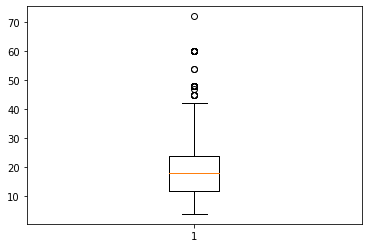

In [56]:
#Look closely at the Credit amount column.
plt.boxplot(data['Duration'])

In [57]:
#We see that there are some great outliers here. 
#let's look closer to these.
outliers = data[data['Duration'] > 55]
outliers.head(20)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,percentage
29,63,male,2,own,little,little,6836,60,business,bad,23
134,21,female,2,own,moderate,no_inf,10144,60,radio/TV,good,80
255,27,male,1,own,no_inf,moderate,7418,60,radio/TV,good,71
332,24,female,3,own,moderate,moderate,7408,60,car,bad,20
373,63,male,3,free,no_inf,no_inf,13756,60,car,good,92
374,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad,42
616,27,male,3,free,no_inf,moderate,9157,60,radio/TV,good,75
637,21,male,2,own,little,no_inf,15653,60,radio/TV,good,62
672,42,male,3,own,little,no_inf,10366,60,car,good,85
677,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad,28


Only the one with a duration of 72 stands out, the rest seems to be in line. Let's leave them in for the first test. We can go back afterwards to see what will happen if we leave them out. 

## Making the text columns Numeric
We first need to make all column input numeric to use them further on. 
This is what I will do now. 

In [58]:
#let's load the required packages
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [59]:
#let's see what columns are of the type 'object', those need to be transformed. 
data.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
percentage           int64
dtype: object

In [60]:
# Let's transform the categorical variables to continous variables
column_names = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

for col in column_names:
    data[col] = le.fit_transform(data[col])
    
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,percentage
0,67,1,2,1,2,0,1169,6,5,1,76
1,22,0,2,1,0,1,5951,48,5,0,30
2,49,1,1,1,0,2,2096,12,3,1,63
3,45,1,2,0,0,0,7882,42,4,1,76
4,53,1,2,0,0,0,4870,24,1,0,40


In [61]:
data.dtypes

Age                 int64
Sex                 int32
Job                 int64
Housing             int32
Saving accounts     int32
Checking account    int32
Credit amount       int64
Duration            int64
Purpose             int32
Risk                int32
percentage          int64
dtype: object

# Most important features
Let's continue by looking at the most important features according to two different tests. 
Than we will use the top ones to train and test our first model. 

In [62]:
#First we need to split the dataset in the y-column (the target) and the components (X), the independent columns. 
#This is needed as we need to use the X columns to predict the y in the model. 

y = data['percentage'] #the column we want to predict 
X = data.drop(labels = ['Risk', 'percentage'], axis = 1)  #independent columns 

[0.20870497 0.02871384 0.07252975 0.05187824 0.07543332 0.05255025
 0.23795239 0.16819575 0.10404149]


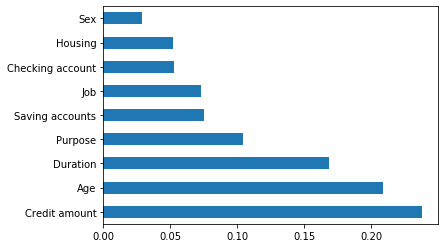

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Name of the column','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

  Name of the column          Score
6      Credit amount  369548.866131
7           Duration    1080.935769
0                Age     419.577858
4    Saving accounts     187.691565
8            Purpose     176.042987
5   Checking account     132.024186
1                Sex      29.177566
3            Housing      24.800239
2                Job      17.457012


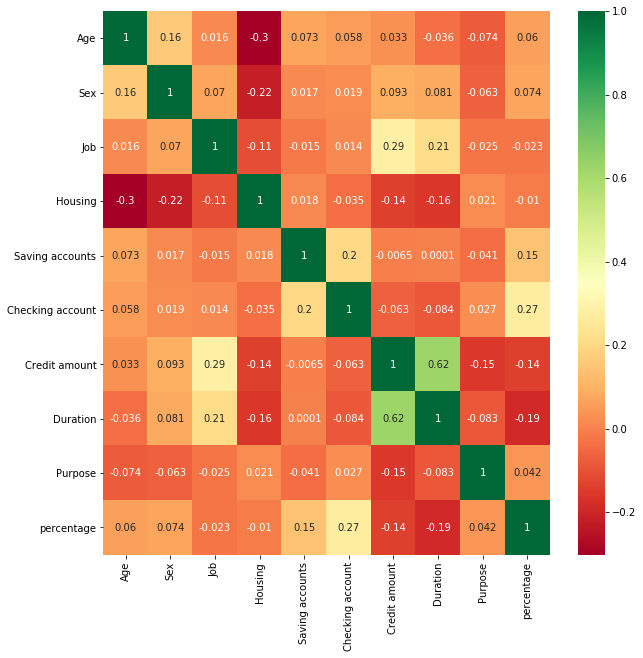

In [74]:
#get correlations of each features in dataset
corrmat = data.drop(labels =['Risk'], axis = 1)
corrmat = corrmat.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Seems that the models differ in what feature is the most important.
For the first test I will keep:
- Credit amount (high in two tests)
- Duration (high in two tests, negative in the correlation, but this is explainable, as the longer the credit, the higher the risk)
- Age (high in one test, mentioned in the other)
- Checking account (high in two tests)

Let's compare the result with all features

# Machine learning Model
As this is a binary problem (good or bad credit), I choose for binary models:
- Logistic regression
- Decision Tree
- K-nearest Neighbors


In [66]:
#Load the chosen models here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

## Split the dataset in train and test
Before we are going to use the models choosen, we will first split the dataset in a train and test set.
This because we want to test the performance of the model on the training set and to be able to check it's accuracy. 


In [67]:
from sklearn.model_selection import train_test_split

#First try with the 4 most important features
X_4 = data[['Saving accounts', 'Duration', 'Age', 'Checking account']] #independent columns chosen 
y = data.iloc[:,-1]    #target column 

#I want to withhold 35 % of the trainset to perform the tests
X_train, X_test, y_train, y_test= train_test_split(X_4,y, test_size=0.35 , random_state = 25)

In [68]:
print('Shape of X_train is: ', X_train.shape)
print('Shape of X_test is: ', X_test.shape)
print('Shape of Y_train is: ', y_train.shape)
print('Shape of y_test is: ', y_test.shape)

Shape of X_train is:  (650, 4)
Shape of X_test is:  (350, 4)
Shape of Y_train is:  (650,)
Shape of y_test is:  (350,)


In [69]:
#Let's confirm that we use the same number of status approved versus disapproved in the test and train data.
#As approved is 1, this can be counted easily. 
print('The % approved status versus not approved in original_data :', data['Risk'].value_counts().values/ len(data))
print('\nThe % approved status versus not approved in y_train :', y_train.value_counts().values/ len(y_train))
print('\nThe % approved status versus not approved in in y_test :', y_test.value_counts().values/ len(y_test))

The % approved status versus not approved in original_data : [0.7 0.3]

The % approved status versus not approved in y_train : [0.02307692 0.02307692 0.02307692 0.02153846 0.02       0.02
 0.02       0.01846154 0.01846154 0.01846154 0.01846154 0.01846154
 0.01846154 0.01846154 0.01846154 0.01692308 0.01692308 0.01538462
 0.01538462 0.01538462 0.01538462 0.01384615 0.01384615 0.01384615
 0.01384615 0.01384615 0.01230769 0.01230769 0.01230769 0.01230769
 0.01230769 0.01230769 0.01076923 0.01076923 0.01076923 0.01076923
 0.01076923 0.01076923 0.01076923 0.01076923 0.01076923 0.00923077
 0.00923077 0.00923077 0.00923077 0.00923077 0.00923077 0.00923077
 0.00923077 0.00923077 0.00923077 0.00769231 0.00769231 0.00769231
 0.00769231 0.00769231 0.00769231 0.00769231 0.00769231 0.00769231
 0.00769231 0.00769231 0.00769231 0.00769231 0.00769231 0.00769231
 0.00769231 0.00615385 0.00615385 0.00615385 0.00615385 0.00615385
 0.00615385 0.00615385 0.00615385 0.00615385 0.00615385 0.00615385
 0.00615

This looks fine! 

# Try and check the models 

In [70]:
#To check the models, I want to build a check matrix within two functions:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('DETAILS ACCURACY, PRECISION AND RECALL')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

In [71]:
#Start with the K-Nearest Neighbors
K_n = KNeighborsClassifier()
K_n.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [72]:
#Now let's see how this model performs
prob_K = K_n.predict_proba(X_test)
print_metrics(y_test, prob_K, 0.3) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive         1                 0
Actual negative         3                 0

DETAILS ACCURACY, PRECISION AND RECALL
Accuracy        0.00


C:\Users\Renate\Anaconda3\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
#Continue with the decision tree with a max number of layers of 3
D_tree = DecisionTreeClassifier(max_depth = 6)
D_tree.fit(X_train, y_train)

In [ ]:
#let's see it's performance
prob_D = D_tree.predict_proba(X_test)
print_metrics(y_test, prob_D, 0.3)

In [ ]:
# logistic_regression model
logistic_mod = LogisticRegression(C = 1.0, class_weight = {0:0.70, 1:0.30}) 
logistic_mod.fit(X_train, y_train)

In [ ]:
#Check the performance of the logistic regression model
probabilities = logistic_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.3) 

In [ ]:
#Let's try with all the features
X =  data.drop(labels = ['Risk'], axis = 1)  #independent columns 
y = data.iloc[:,-1]    #target column 

#I want to withhold 35 % of the trainset to perform the tests
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.35 , random_state = 25)

print('Shape of X_train is: ', X_train.shape)
print('Shape of X_test is: ', X_test.shape)
print('Shape of Y_train is: ', y_train.shape)
print('Shape of y_test is: ', y_test.shape)

In [ ]:
#Start with the K-Nearest Neighbors
K_n = KNeighborsClassifier()
K_n.fit(X_train, y_train)

In [ ]:
#Now let's see how this model performs
prob_K = K_n.predict_proba(X_test)
print_metrics(y_test, prob_K, 0.35) 

In [ ]:
#Continue with the decision tree with a max number of layers of 3
D_tree = DecisionTreeClassifier(max_depth = 6)
D_tree.fit(X_train, y_train)

In [ ]:
#let's see it's performance
prob_D = D_tree.predict_proba(X_test)
print_metrics(y_test, prob_D, 0.3)

In [ ]:
# logistic_regression model
logistic_mod = LogisticRegression(C = 1.0, class_weight = {0:0.70, 1:0.30}) 
logistic_mod.fit(X_train, y_train)

In [ ]:
#Check the performance of the logistic regression model
probabilities = logistic_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.35) 

In [ ]:
data.info()

In [ ]:
#from site https://planspace.org/20150423-forward_selection_with_statsmodels/

import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {}".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {}".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [ ]:
data = data.rename(columns = {'Saving accounts': 'Saving_accounts',
                              'Checking account': 'Checking_account',
                              'Credit amount': 'Credit_amount'})
model_new = forward_selected(data, 'Risk')


In [ ]:
print(model_new.model.formula)

In [ ]:
#Test with new set of columns
X_new =  data[['Checking_account', 'Duration', 'Saving_accounts',
               'Sex','Purpose','Age']]  #independent columns 
y = data.iloc[:,-1]    #target column 

#I want to withhold 35 % of the trainset to perform the tests
X_train, X_test, y_train, y_test= train_test_split(X_new,y, test_size=0.35 , random_state = 25)

print('Shape of X_train is: ', X_train.shape)
print('Shape of X_test is: ', X_test.shape)
print('Shape of Y_train is: ', y_train.shape)
print('Shape of y_test is: ', y_test.shape)

In [ ]:
# logistic_regression model
logistic_mod = LogisticRegression(C = 1.0, class_weight = {0:0.70, 1:0.30}) 
logistic_mod.fit(X_train, y_train)

In [ ]:
#Check the performance of the logistic regression model
probabilities = logistic_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.35) 